In [474]:
import pandas as pd
from sklearn import preprocessing
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import classification_report

data = pd.read_csv(r'C:\Users\Aaron\Documents\dataset_31_credit-g.csv')
y = data['class']
data = pd.get_dummies(data)

In [475]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 63 columns):
 #   Column                                           Non-Null Count  Dtype
---  ------                                           --------------  -----
 0   duration                                         1000 non-null   int64
 1   credit_amount                                    1000 non-null   int64
 2   installment_commitment                           1000 non-null   int64
 3   residence_since                                  1000 non-null   int64
 4   age                                              1000 non-null   int64
 5   existing_credits                                 1000 non-null   int64
 6   num_dependents                                   1000 non-null   int64
 7   checking_status_'0<=X<200'                       1000 non-null   uint8
 8   checking_status_'<0'                             1000 non-null   uint8
 9   checking_status_'>=200'                          1000

In [476]:
data.describe()

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents,checking_status_'0<=X<200',checking_status_'<0',checking_status_'>=200',...,job_'high qualif/self emp/mgmt',job_'unemp/unskilled non res',job_'unskilled resident',job_skilled,own_telephone_none,own_telephone_yes,foreign_worker_no,foreign_worker_yes,class_bad,class_good
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000,0.269000,0.274000,0.063000,...,0.148000,0.022000,0.2000,0.630000,0.596000,0.404000,0.037000,0.963000,0.300000,0.700000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086,0.443662,0.446232,0.243085,...,0.355278,0.146757,0.4002,0.483046,0.490943,0.490943,0.188856,0.188856,0.458487,0.458487
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.0000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [477]:
# Base Case - Logistic Regression
X = data.drop(['class_bad','class_good'],axis=1)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

logReg = LogisticRegression()
logReg = logReg.fit(X_train,y_train)
y_pred = logReg.predict(X_test)
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

         bad       0.54      0.49      0.52        85
        good       0.81      0.83      0.82       215

    accuracy                           0.74       300
   macro avg       0.67      0.66      0.67       300
weighted avg       0.73      0.74      0.73       300



C:\Users\Aaron\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


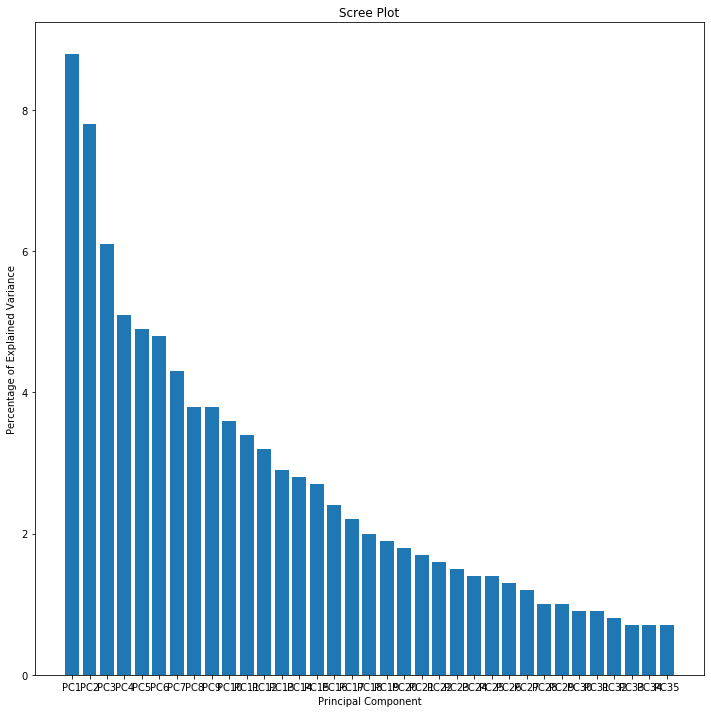

In [478]:
# Scalers and PCA Analysis
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
import numpy as np


# Scale Data

scaler = StandardScaler().fit(data)
scaled_data = scaler.transform(data)

scaler = MinMaxScaler().fit(data)
scaled_data = scaler.transform(data)



pca =PCA(.95)
pca.fit(scaled_data)
pca_data = pca.transform(scaled_data)

per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]

plt.figure(figsize=(12,12)) 
    
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

In [479]:
print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_))

[0.08811235 0.07814612 0.0610071  0.05103638 0.04929397 0.04779951
 0.04282563 0.03806808 0.03784575 0.03614451 0.03364257 0.03214136
 0.02865994 0.02803715 0.02663968 0.02401256 0.0220045  0.02047106
 0.01851368 0.01785638 0.01738535 0.01627104 0.01548953 0.01418524
 0.0135358  0.01280751 0.01216377 0.01041869 0.00962257 0.00931149
 0.00855085 0.00804003 0.00742194 0.00723128 0.00693511]
0.9516284834510121


In [480]:
# Case 2 - Logistic Regression w/ PCA, reduced dimensions and about the same accuracy

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

pca = PCA(.95)
pca.fit(X_train)

X_train = pca.transform(X_train)
X_test = pca.transform(X_test)


logReg = LogisticRegression()
logReg = logReg.fit(X_train,y_train)
y_pred = logReg.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         bad       0.60      0.03      0.06        89
        good       0.71      0.99      0.83       211

    accuracy                           0.71       300
   macro avg       0.65      0.51      0.44       300
weighted avg       0.68      0.71      0.60       300



C:\Users\Aaron\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


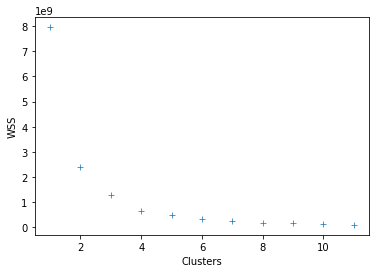

In [481]:
# K-Means Clustering - Elbow chart
import sklearn.cluster as cluster

data = data.drop(['class_bad','class_good'],axis=1)

K=range(1,12)
wss = []

for k in K:
    kmeans= cluster.KMeans(n_clusters=k,init="k-means++")
    kmeans = kmeans.fit(data)
    wss_iter = kmeans.inertia_
    wss.append(wss_iter)
mycenters = pd.DataFrame({'Clusters' : K, 'WSS' : wss})
sns.scatterplot(x = 'Clusters', y = 'WSS', data = mycenters, marker ="+" )

In [482]:
from sklearn.cluster import KMeans

# K means clustering 
kmeans = KMeans(n_clusters = 3)
KMmodel = kmeans.fit(data)

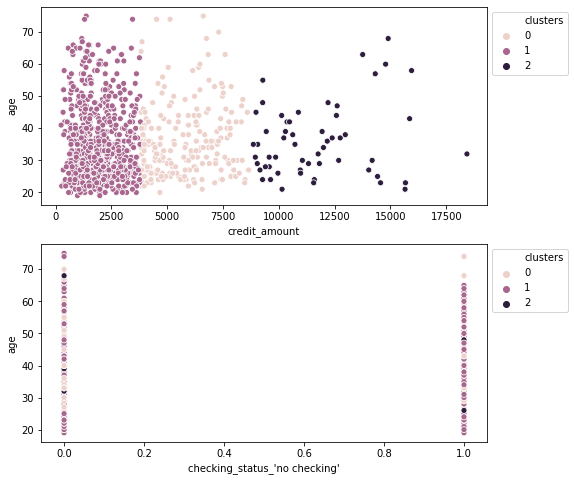

In [483]:
data['clusters'] = KMmodel.labels_

plt.figure(figsize=(8,8))

plt.subplot(2,1,1)
sns.scatterplot(x='credit_amount', y='age',hue='clusters',data=data)
plt.legend(bbox_to_anchor=(1, 1), loc=2) 

plt.subplot(2,1,2)
sns.scatterplot(x="checking_status_'no checking'", y='age',hue='clusters',data=data)
plt.legend(bbox_to_anchor=(1, 1), loc=2) 

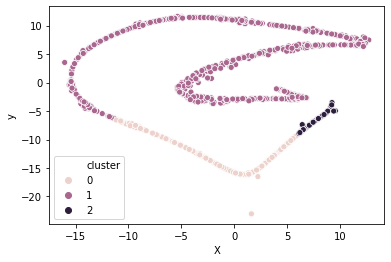

In [484]:
#TSNE
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

tsne = TSNE(n_components=3, random_state=0)
twoD = tsne.fit_transform(data)

df = pd.DataFrame()

df['X'] = twoD[:,0]
df['y'] = twoD[:,1]
df['cluster'] = KMmodel.labels_

sns.scatterplot(x='X', y="y",hue='cluster' ,data=df)
plt.show()

In [485]:
# Create a model for each cluster and review results
data['class'] = y
data1 = data[data['clusters'] == 0]
data2 = data[data['clusters'] == 1]
data3 = data[data['clusters'] == 2]

display(data1.shape)
display(data2.shape)
display(data3.shape)
display(data1)

(216, 63)

(728, 63)

(56, 63)

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents,checking_status_'0<=X<200',checking_status_'<0',checking_status_'>=200',...,job_'high qualif/self emp/mgmt',job_'unemp/unskilled non res',job_'unskilled resident',job_skilled,own_telephone_none,own_telephone_yes,foreign_worker_no,foreign_worker_yes,clusters,class
1,48,5951,2,2,22,1,1,1,0,0,...,0,0,0,1,1,0,0,1,0,bad
3,42,7882,2,4,45,1,2,0,1,0,...,0,0,0,1,1,0,0,1,0,good
4,24,4870,3,4,53,2,2,0,1,0,...,0,0,0,1,1,0,0,1,0,bad
7,36,6948,2,2,35,1,1,1,0,0,...,1,0,0,0,0,1,0,1,0,good
9,30,5234,4,2,28,2,1,1,0,0,...,1,0,0,0,1,0,0,1,0,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
986,42,6289,2,1,33,2,1,0,0,1,...,0,0,0,1,1,0,0,1,0,good
988,24,6579,4,2,29,1,1,0,1,0,...,1,0,0,0,0,1,0,1,0,good
993,36,3959,4,3,30,1,1,0,1,0,...,1,0,0,0,0,1,0,1,0,good
996,30,3857,4,4,40,1,1,0,1,0,...,1,0,0,0,0,1,0,1,0,good


In [486]:
# Case 1a - Logistic Regression Model on Cluster 0

X = data1.drop(['class','clusters'],axis=1)

y = data1['class']

#Scale data before PCA
scaler = MinMaxScaler().fit(X)
X = scaler.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

pca = PCA(.95)
pca.fit(X_train)

X_train = pca.transform(X_train)
X_test = pca.transform(X_test)



logReg = LogisticRegression()
logReg = logReg.fit(X_train,y_train)
y_pred = logReg.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         bad       0.61      0.46      0.52        24
        good       0.72      0.83      0.77        41

    accuracy                           0.69        65
   macro avg       0.67      0.64      0.65        65
weighted avg       0.68      0.69      0.68        65



C:\Users\Aaron\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [487]:
# Case 1b - Logistic Regression Model on Cluster 1

X = data2.drop(['class','clusters'],axis=1)

y = data2['class']


#Scale data before PCA
scaler = MinMaxScaler().fit(X)
X = scaler.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

pca = PCA(.95)
pca.fit(X_train)

X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

logReg = LogisticRegression()
logReg = logReg.fit(X_train,y_train)
y_pred = logReg.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         bad       0.57      0.46      0.51        56
        good       0.83      0.88      0.85       163

    accuracy                           0.77       219
   macro avg       0.70      0.67      0.68       219
weighted avg       0.76      0.77      0.76       219



C:\Users\Aaron\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [488]:
# Case 1c - Logistic Regression Model on Cluster 2

X = data3.drop(['class','clusters'],axis=1)

y = data3['class']

#Scale data before PCA
scaler = MinMaxScaler().fit(X)
X = scaler.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


pca = PCA(.95)
pca.fit(X_train)

X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

logReg = LogisticRegression()
logReg = logReg.fit(X_train,y_train)
y_pred = logReg.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         bad       0.56      0.62      0.59         8
        good       0.62      0.56      0.59         9

    accuracy                           0.59        17
   macro avg       0.59      0.59      0.59        17
weighted avg       0.59      0.59      0.59        17



C:\Users\Aaron\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [489]:
# Anamoly Detection AutoEncoder

data = pd.read_csv(r'C:\Users\Aaron\Documents\dataset_31_credit-g.csv')
data_good = data[data['class'] == 'good']
data_bad = data[data['class'] == 'bad']

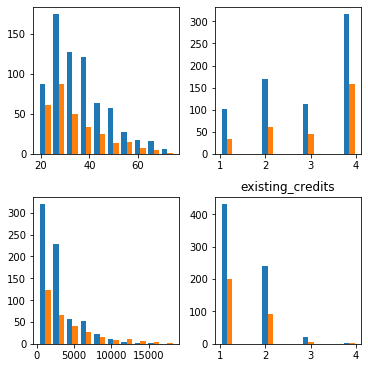

In [523]:
# Plot Histogram of continuous variables

fig, axs = plt.subplots(2, 2, figsize=(5, 5),constrained_layout=True)

axs[0,0].hist([data_good['age'],data_bad['age']])
plt.title('age')
axs[1,0].hist([data_good['credit_amount'],data_bad['credit_amount']])
plt.title('credit_amount')
axs[0,1].hist([data_good['installment_commitment'],data_bad['installment_commitment']])
plt.title('installment_commitment')
axs[1,1].hist([data_good['existing_credits'],data_bad['existing_credits']])
plt.title('existing_credits')




plt.show()

In [491]:
y = data['class']
data = pd.get_dummies(data)
data['class'] = y
data_good = data[data['class'] == 'good']
data_bad = data[data['class'] == 'bad']
#scaler = MinMaxScaler().fit(data.drop('class',axis=1))
#scaled_data = scaler.transform(data.drop('class'),axis=1)

In [492]:
data_good = data_good.drop(['class','class_good','class_bad'],axis=1)
data_bad = data_bad.drop(['class','class_good','class_bad'],axis=1)

In [493]:
scaler_good = MinMaxScaler().fit(data_good)
scaled_data_good = scaler.transform(data_good)

Good_train, Good_test = train_test_split(scaled_data_good, test_size=0.3)

scaler_bad = MinMaxScaler().fit(data_bad)
scaled_data_bad = scaler.transform(data_bad)

X_train, X_test = train_test_split(scaled_data_bad, test_size=0.3)

In [494]:
import tensorflow as tf
from tensorflow import keras

# Building Architecture
# 2 Hidden Layers #20 nodes per inner layer
model = keras.Sequential([
    keras.layers.Dense(20,activation="sigmoid"), # Fully connected hidden layer
    keras.layers.Dense(20,activation="sigmoid"),
    keras.layers.Dense(data_good.shape[1]) # Output Layer
])
model.compile(optimizer="adam",loss="mean_squared_error")
model.fit(Good_train,Good_train,verbose=1,epochs=50)

Epoch 1/50
16/16 [==============================] - 1s 1ms/step - loss: 0.3917
Epoch 2/50
16/16 [==============================] - 0s 1ms/step - loss: 0.2690
Epoch 3/50
16/16 [==============================] - 0s 2ms/step - loss: 0.2059
Epoch 4/50
16/16 [==============================] - 0s 1ms/step - loss: 0.1705
Epoch 5/50
16/16 [==============================] - 0s 1ms/step - loss: 0.1485
Epoch 6/50
16/16 [==============================] - 0s 1ms/step - loss: 0.1365
Epoch 7/50
16/16 [==============================] - 0s 1ms/step - loss: 0.1275
Epoch 8/50
16/16 [==============================] - 0s 1ms/step - loss: 0.1236
Epoch 9/50
16/16 [==============================] - 0s 1ms/step - loss: 0.1214
Epoch 10/50
16/16 [==============================] - 0s 1ms/step - loss: 0.1211
Epoch 11/50
16/16 [==============================] - 0s 1ms/step - loss: 0.1198
Epoch 12/50
16/16 [==============================] - 0s 1ms/step - loss: 0.1188
Epoch 13/50
16/16 [==============================

In [495]:
import numpy as np

#Evaluate Model for Anamolies

pred = model.predict(Good_test)
score1 = np.sqrt(metrics.mean_squared_error(pred,Good_test))
pred = model.predict(scaled_data_good)
score2 = np.sqrt(metrics.mean_squared_error(pred,scaled_data_good))
pred = model.predict(scaled_data_bad)
score3 = np.sqrt(metrics.mean_squared_error(pred,scaled_data_bad))
print(f"Out of Sample Normal Score (RMSE): {score1}")
print(f"Insample Normal Score (RMSE): {score2}")
print(f" Bad Credit Anamolies (RMSE): {score3}")

Out of Sample Normal Score (RMSE): 0.3112191781285911
Insample Normal Score (RMSE): 0.30962212064783845
 Bad Credit Anamolies (RMSE): 0.3267497033642566
